<a href="https://colab.research.google.com/github/frnunez/COVID-19/blob/master/covid/NYCDOH_Covid_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
import json

# Git Repo URL
url="https://github.com/frnunez/nyc-doh-coronavirus-data/raw/master"


# import data
daily_data = f'{url}/trends/data-by-day.csv'
testing_data = f'{url}/trends/tests.csv'
zipcode_data = f'{url}/totals/data-by-modzcta.csv'



### Cases, Hospitalizations, Deaths

In [ ]:
# create daily counts dataframe for cases, hospitalizations, deaths
daily_df = pd.read_csv(daily_data)
daily_df.head()

,date_of_interest,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,DEATH_COUNT_PROBABLE,CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,BX_CASE_COUNT_7DAY_AVG,BX_HOSPITALIZED_COUNT_7DAY_AVG,BX_DEATH_COUNT_7DAY_AVG,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_COUNT_7DAY_AVG,BK_HOSPITALIZED_COUNT_7DAY_AVG,BK_DEATH_COUNT_7DAY_AVG,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,MN_CASE_COUNT_7DAY_AVG,MN_HOSPITALIZED_COUNT_7DAY_AVG,MN_DEATH_COUNT_7DAY_AVG,QN_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT,QN_CASE_COUNT_7DAY_AVG,QN_HOSPITALIZED_COUNT_7DAY_AVG,QN_DEATH_COUNT_7DAY_AVG,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
daily_df.dtypes

date_of_interest                  object
CASE_COUNT                         int64
HOSPITALIZED_COUNT                 int64
DEATH_COUNT                        int64
DEATH_COUNT_PROBABLE               int64
CASE_COUNT_7DAY_AVG                int64
HOSP_COUNT_7DAY_AVG                int64
DEATH_COUNT_7DAY_AVG               int64
BX_CASE_COUNT                      int64
BX_HOSPITALIZED_COUNT              int64
BX_DEATH_COUNT                     int64
BX_CASE_COUNT_7DAY_AVG             int64
BX_HOSPITALIZED_COUNT_7DAY_AVG     int64
BX_DEATH_COUNT_7DAY_AVG            int64
BK_CASE_COUNT                      int64
BK_HOSPITALIZED_COUNT              int64
BK_DEATH_COUNT                     int64
BK_CASE_COUNT_7DAY_AVG             int64
BK_HOSPITALIZED_COUNT_7DAY_AVG     int64
BK_DEATH_COUNT_7DAY_AVG            int64
MN_CASE_COUNT                      int64
MN_HOSPITALIZED_COUNT              int64
MN_DEATH_COUNT                     int64
MN_CASE_COUNT_7DAY_AVG             int64
MN_HOSPITALIZED_

In [ ]:
# turn into a time series
daily_ts = daily_df
daily_ts['date_of_interest'] = pd.to_datetime(daily_ts['date_of_interest'])
#daily_ts['DATE_OF_INTEREST'] = daily_ts['DATE_OF_INTEREST'].dt.strftime('%Y-%m-%d')
#daily_ts = daily_ts.set_index('DATE_OF_INTEREST')
daily_ts.head()

,date_of_interest,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,DEATH_COUNT_PROBABLE,CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,BX_CASE_COUNT_7DAY_AVG,BX_HOSPITALIZED_COUNT_7DAY_AVG,BX_DEATH_COUNT_7DAY_AVG,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_COUNT_7DAY_AVG,BK_HOSPITALIZED_COUNT_7DAY_AVG,BK_DEATH_COUNT_7DAY_AVG,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,MN_CASE_COUNT_7DAY_AVG,MN_HOSPITALIZED_COUNT_7DAY_AVG,MN_DEATH_COUNT_7DAY_AVG,QN_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT,QN_CASE_COUNT_7DAY_AVG,QN_HOSPITALIZED_COUNT_7DAY_AVG,QN_DEATH_COUNT_7DAY_AVG,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,2020-02-29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-04,5,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create Lists for plotting
dates = daily_ts['date_of_interest'].tolist()
cases = daily_ts['CASE_COUNT'].tolist()
sevendaycases = daily_ts['CASE_COUNT_7DAY_AVG'].tolist()
hospitalizations = daily_ts['HOSPITALIZED_COUNT'].tolist()
sevendayhosp = daily_ts['HOSP_COUNT_7DAY_AVG'].tolist()
deaths = daily_ts['DEATH_COUNT'].tolist()
sevendaydeaths = daily_ts['DEATH_COUNT_7DAY_AVG'].tolist()

In [ ]:
# Create borough Lists for plotting

# Bronx
bxcases = daily_ts['BX_CASE_COUNT'].tolist()
bxsevendaycases = daily_ts['BX_CASE_COUNT_7DAY_AVG'].tolist()
bxhospitalizations = daily_ts['BX_HOSPITALIZED_COUNT'].tolist()
bxsevendayhosp = daily_ts['BX_HOSPITALIZED_COUNT_7DAY_AVG'].tolist()
bxdeaths = daily_ts['BX_DEATH_COUNT'].tolist()
bxsevendaydeaths = daily_ts['BX_DEATH_COUNT_7DAY_AVG'].tolist()

# Brooklyn
bkcases = daily_ts['BK_CASE_COUNT'].tolist()
bksevendaycases = daily_ts['BK_CASE_COUNT_7DAY_AVG'].tolist()
bkhospitalizations = daily_ts['BK_HOSPITALIZED_COUNT'].tolist()
bksevendayhosp = daily_ts['BK_HOSPITALIZED_COUNT_7DAY_AVG'].tolist()
bkdeaths = daily_ts['BK_DEATH_COUNT'].tolist()
bksevendaydeaths = daily_ts['BK_DEATH_COUNT_7DAY_AVG'].tolist()

# Manhattan
mncases = daily_ts['MN_CASE_COUNT'].tolist()
mnsevendaycases = daily_ts['MN_CASE_COUNT_7DAY_AVG'].tolist()
mnhospitalizations = daily_ts['MN_HOSPITALIZED_COUNT'].tolist()
mnsevendayhosp = daily_ts['MN_HOSPITALIZED_COUNT_7DAY_AVG'].tolist()
mndeaths = daily_ts['MN_DEATH_COUNT'].tolist()
mnsevendaydeaths = daily_ts['MN_DEATH_COUNT_7DAY_AVG'].tolist()

# Queens
qncases = daily_ts['QN_CASE_COUNT'].tolist()
qnsevendaycases = daily_ts['QN_CASE_COUNT_7DAY_AVG'].tolist()
qnhospitalizations = daily_ts['QN_HOSPITALIZED_COUNT'].tolist()
qnsevendayhosp = daily_ts['QN_HOSPITALIZED_COUNT_7DAY_AVG'].tolist()
qndeaths = daily_ts['QN_DEATH_COUNT'].tolist()
qnsevendaydeaths = daily_ts['QN_DEATH_COUNT_7DAY_AVG'].tolist()

# Staten Island
sicases = daily_ts['SI_CASE_COUNT'].tolist()
sisevendaycases = daily_ts['SI_CASE_COUNT_7DAY_AVG'].tolist()
sihospitalizations = daily_ts['SI_HOSPITALIZED_COUNT'].tolist()
sisevendayhosp = daily_ts['SI_HOSPITALIZED_COUNT_7DAY_AVG'].tolist()
sideaths = daily_ts['SI_DEATH_COUNT'].tolist()
sisevendaydeaths = daily_ts['SI_DEATH_COUNT_7DAY_AVG'].tolist()


In [ ]:
# create peakdates function to print out the count and date for each category where we want to look at peaks
def peakdates (count,dates):
  maxcount = max(count)
  peakdayindex = count.index(maxcount)
  peakday = dates[peakdayindex].strftime('%Y-%m-%d')
  #print("Maximum count is", maxcount," which occured on:", peakday)
  print("The peak occured on", peakday,"and had a count of", maxcount)

In [ ]:
# Peak # of cases
peakdates(cases,dates)

The peak occured on 2020-04-06 and had a count of 6353


In [ ]:
# Peak # of hospitalizations
peakdates(hospitalizations,dates)

The peak occured on 2020-03-30 and had a count of 1835


In [ ]:
# Peak # of deaths
peakdates(deaths,dates)

The peak occured on 2020-04-07 and had a count of 599


Text(0.5, 1.0, 'Total Covid-19 Cases in NYC')

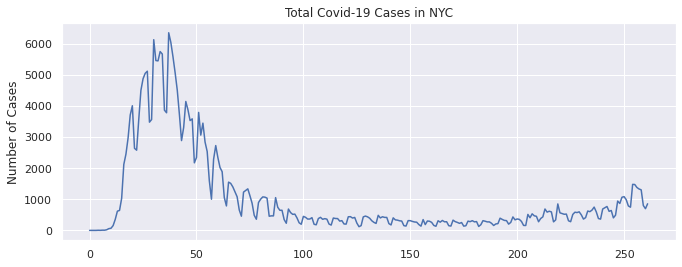

In [ ]:
import matplotlib.pyplot as plt #for plotting
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

#case count plot
ax = daily_df['CASE_COUNT'].plot()
ax.set_ylabel('Number of Cases')
ax.set_title('Total Covid-19 Cases in NYC')

The peak occured on 2020-04-06 and had a count of 6353


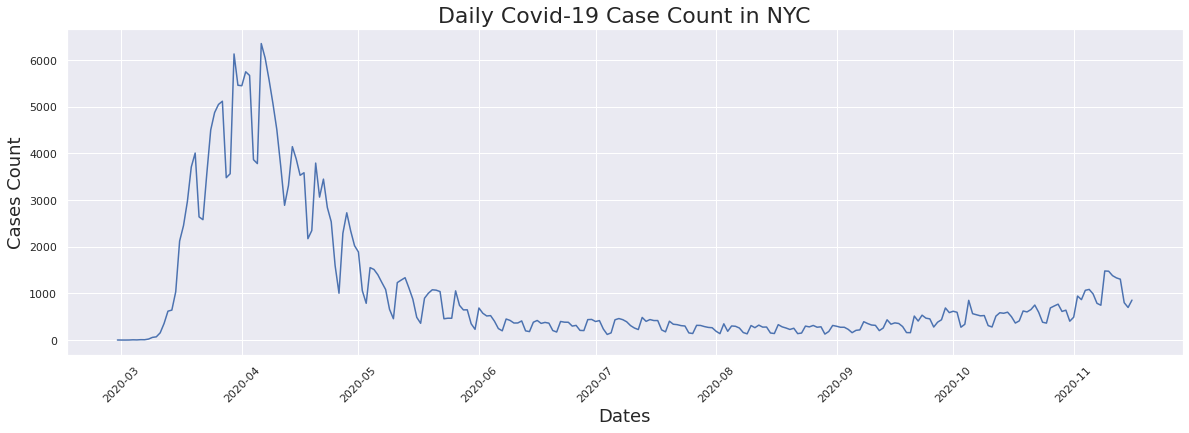

In [ ]:
# Cases Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Case Count in NYC', fontsize = 22)
plt.ylabel('Cases Count', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)

plt.plot(dates, cases)
peakdates(cases,dates)

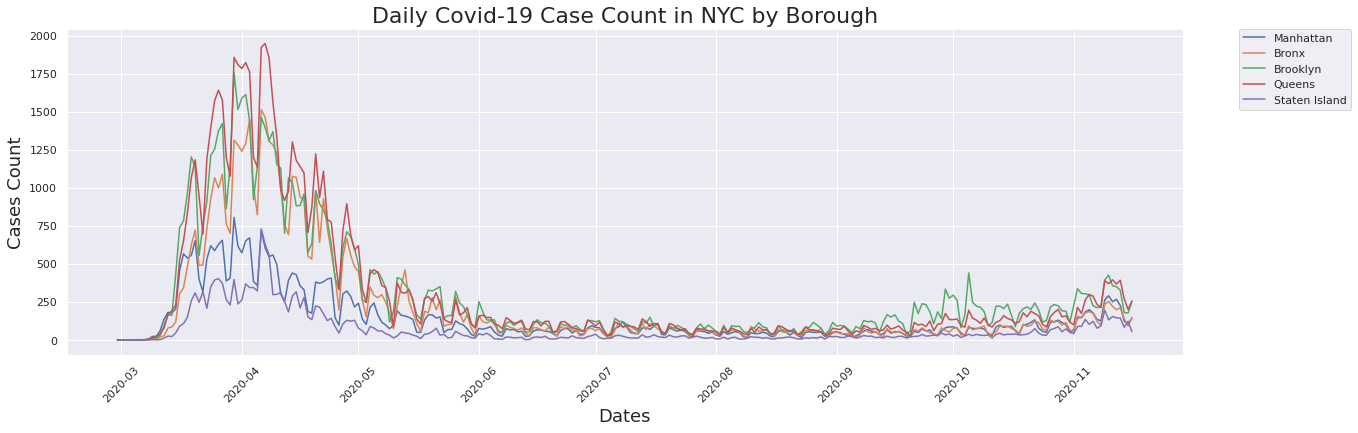

In [ ]:
# Cases Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Case Count in NYC by Borough', fontsize = 22)
plt.ylabel('Cases Count', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)

#plt.plot(dates, cases)
plt.plot(dates, mncases, label="Manhattan")
plt.plot(dates, bxcases, label="Bronx")
plt.plot(dates, bkcases, label="Brooklyn")
plt.plot(dates, qncases, label="Queens")
plt.plot(dates, sicases, label="Staten Island")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#peakdates(cases,dates)

The peak occured on 2020-03-30 and had a count of 1835


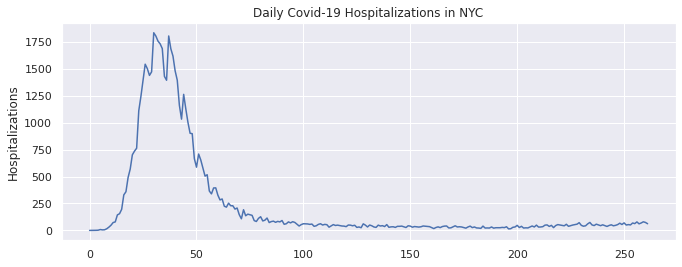

In [ ]:
#case count plot
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = daily_df['HOSPITALIZED_COUNT'].plot()
ax.set_ylabel('Hospitalizations')
ax.set_title('Daily Covid-19 Hospitalizations in NYC')
peakdates(hospitalizations,dates)

The peak occured on 2020-03-30 and had a count of 1835


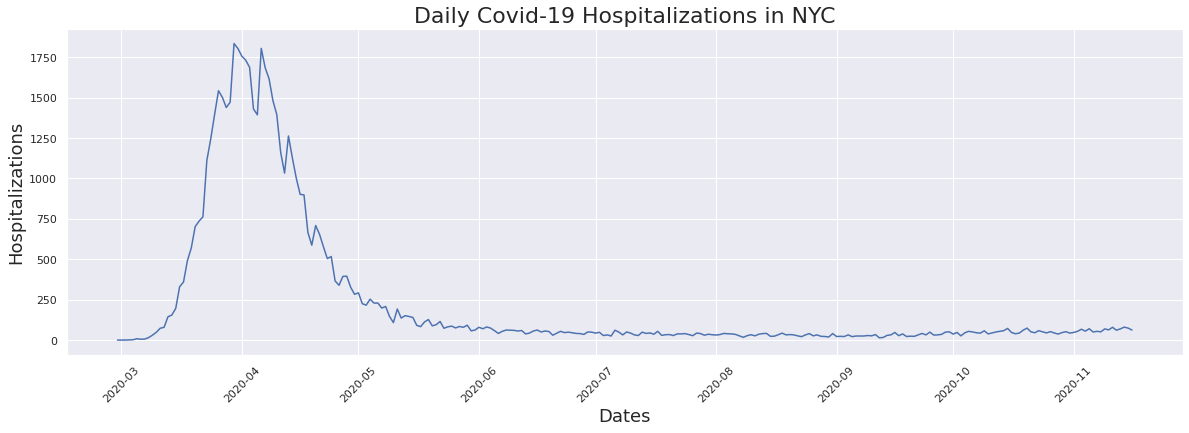

In [ ]:
# Hospitalizations Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Hospitalizations in NYC', fontsize = 22)
plt.ylabel('Hospitalizations', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)

plt.plot(dates, hospitalizations)
peakdates(hospitalizations,dates)

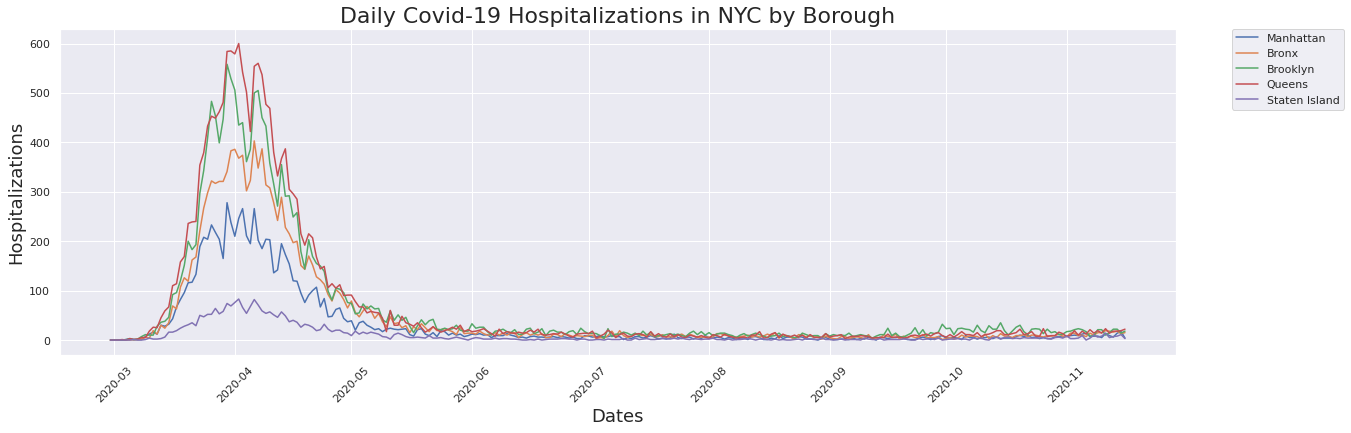

In [ ]:
# Hospitalizations Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Hospitalizations in NYC by Borough', fontsize = 22)
plt.ylabel('Hospitalizations', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)

#plt.plot(dates, hospitalizations)
plt.plot(dates, mnhospitalizations, label="Manhattan")
plt.plot(dates, bxhospitalizations, label="Bronx")
plt.plot(dates, bkhospitalizations, label="Brooklyn")
plt.plot(dates, qnhospitalizations, label="Queens")
plt.plot(dates, sihospitalizations, label="Staten Island")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#peakdates(hospitalizations,dates)

The peak occured on 2020-04-07 and had a count of 599


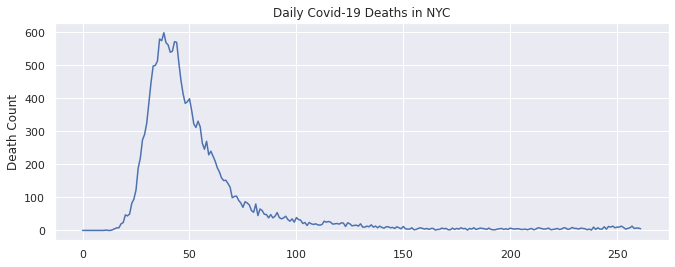

In [ ]:
#case count plot
sns.set(rc={'figure.figsize':(11, 4)})
ax = daily_df['DEATH_COUNT'].plot()
ax.set_ylabel('Death Count')
ax.set_title('Daily Covid-19 Deaths in NYC')
peakdates(deaths,dates)

The peak occured on 2020-04-07 and had a count of 599


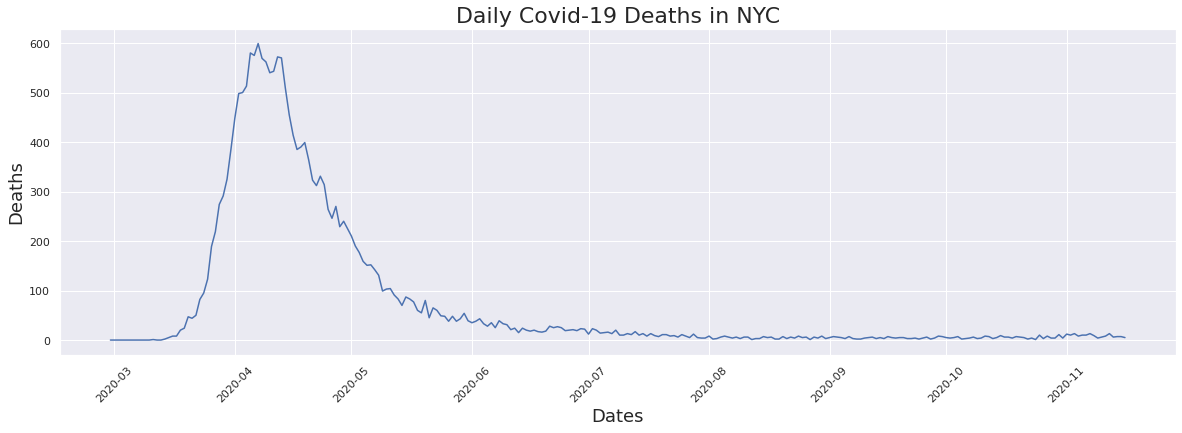

In [ ]:
# Deaths Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Deaths in NYC', fontsize = 22)
plt.ylabel('Deaths', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)

plt.plot(dates, deaths)
peakdates(deaths,dates)

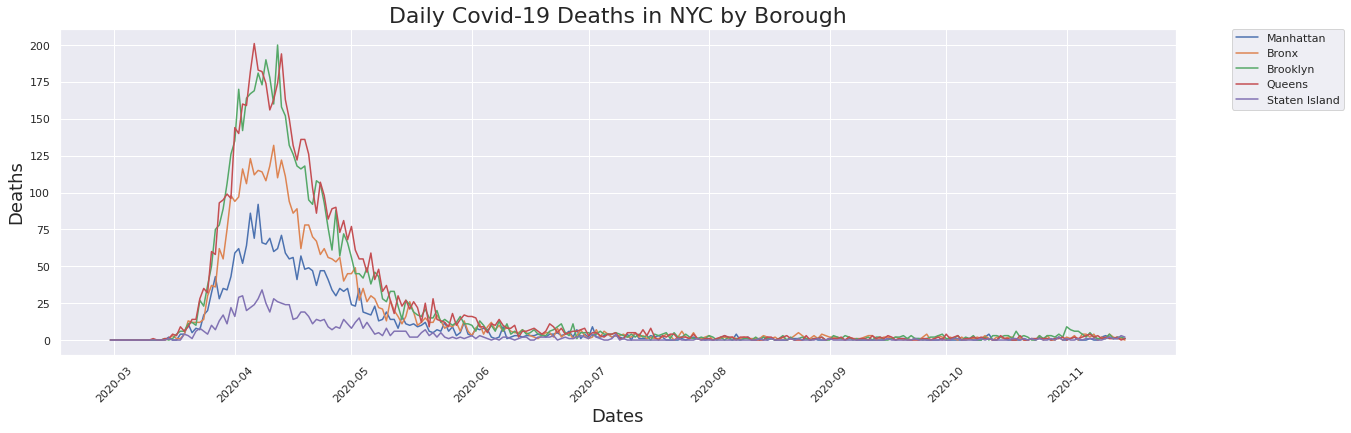

In [ ]:
# Deaths Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Deaths in NYC by Borough', fontsize = 22)
plt.ylabel('Deaths', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)

#plt.plot(dates, deaths)
plt.plot(dates, mndeaths, label="Manhattan")
plt.plot(dates, bxdeaths, label="Bronx")
plt.plot(dates, bkdeaths, label="Brooklyn")
plt.plot(dates, qndeaths, label="Queens")
plt.plot(dates, sideaths, label="Staten Island")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#peakdates(deaths,dates)

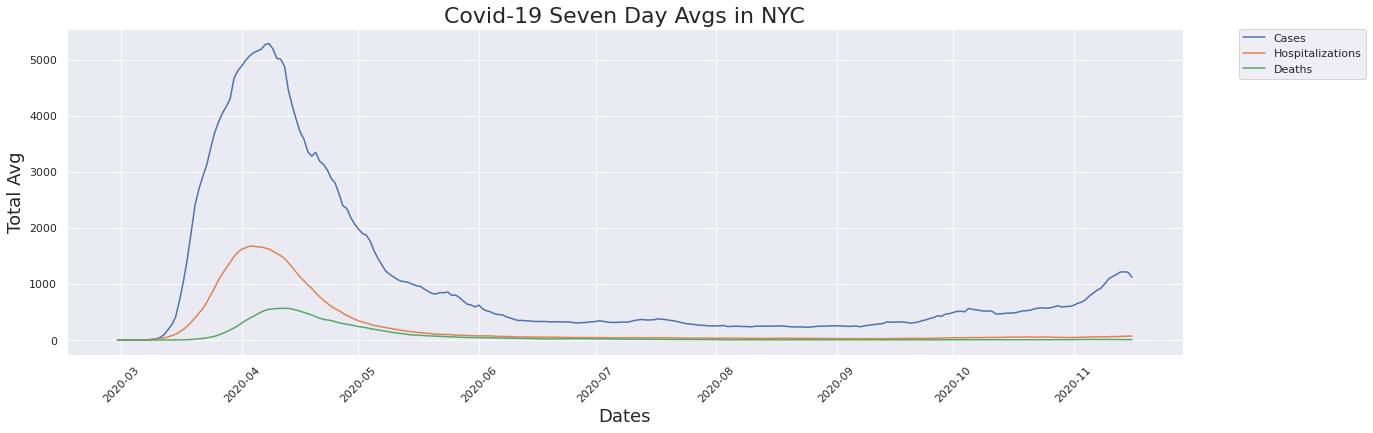

In [ ]:
# 7 Day Avgs
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Covid-19 Seven Day Avgs in NYC', fontsize = 22)
plt.ylabel('Total Avg', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)

plt.plot(dates, sevendaycases, label="Cases")
plt.plot(dates, sevendayhosp, label="Hospitalizations")
plt.plot(dates, sevendaydeaths, label="Deaths")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#peakdates(sevendaycases,dates)

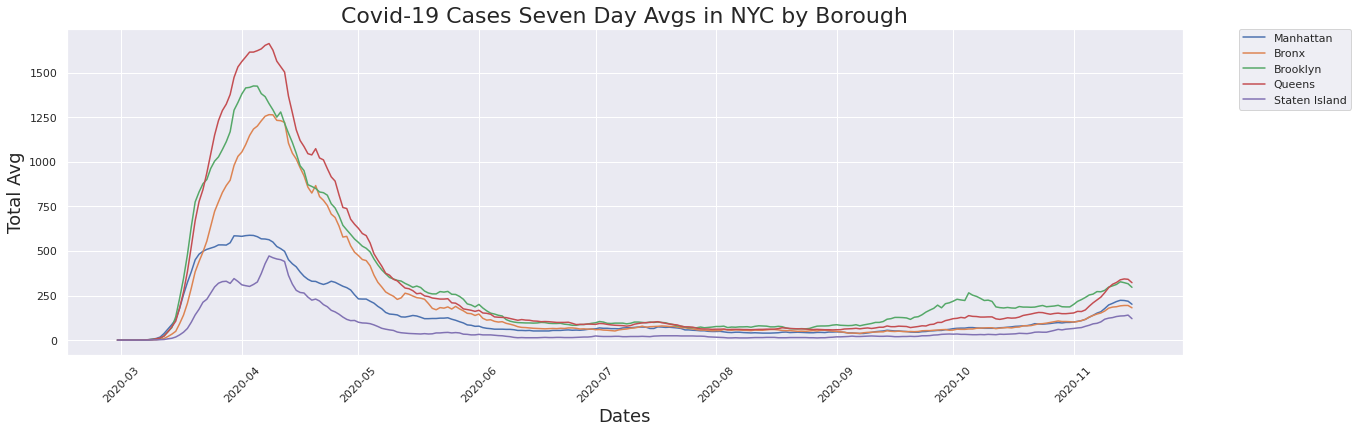

In [ ]:
# 7 Day Avgs
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Covid-19 Cases Seven Day Avgs in NYC by Borough', fontsize = 22)
plt.ylabel('Total Avg', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)

#plt.plot(dates, sevendaycases, label="Cases")
plt.plot(dates, mnsevendaycases, label="Manhattan")
plt.plot(dates, bxsevendaycases, label="Bronx")
plt.plot(dates, bksevendaycases, label="Brooklyn")
plt.plot(dates, qnsevendaycases, label="Queens")
plt.plot(dates, sisevendaycases, label="Staten Island")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#peakdates(sevendaycases,dates)

### Testing

In [ ]:
# create df for data on tests
tests_df = pd.read_csv(testing_data)
tests_df.head()

,DATE,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,TOTAL_TESTS_7DAYS_AVG,POSITIVE_TESTS_7DAYS_AVG,PERCENT_POSITIVE_7DAYS_AVG,INCOMPLETE
0,03/03/2020,14,1,0.0714,NaN,NaN,NaN,NaN
1,03/04/2020,33,5,0.1515,NaN,NaN,NaN,NaN
2,03/05/2020,65,4,0.0615,NaN,NaN,NaN,NaN
3,03/06/2020,85,8,0.0941,NaN,NaN,NaN,NaN
4,03/07/2020,72,8,0.1111,NaN,NaN,NaN,NaN


In [ ]:
tests_df['DAILY_TESTS'] = tests_df.TOTAL_TESTS.diff(periods=1)
tests_df.head()

,DATE,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,TOTAL_TESTS_7DAYS_AVG,POSITIVE_TESTS_7DAYS_AVG,PERCENT_POSITIVE_7DAYS_AVG,INCOMPLETE,DAILY_TESTS
0,03/03/2020,14,1,0.0714,NaN,NaN,NaN,NaN,NaN
1,03/04/2020,33,5,0.1515,NaN,NaN,NaN,NaN,19.0
2,03/05/2020,65,4,0.0615,NaN,NaN,NaN,NaN,32.0
3,03/06/2020,85,8,0.0941,NaN,NaN,NaN,NaN,20.0
4,03/07/2020,72,8,0.1111,NaN,NaN,NaN,NaN,-13.0


In [ ]:
tests_df.dtypes

DATE                           object
TOTAL_TESTS                     int64
POSITIVE_TESTS                  int64
PERCENT_POSITIVE              float64
TOTAL_TESTS_7DAYS_AVG         float64
POSITIVE_TESTS_7DAYS_AVG      float64
PERCENT_POSITIVE_7DAYS_AVG    float64
INCOMPLETE                    float64
DAILY_TESTS                   float64
dtype: object

In [ ]:
# turn into a time series
tests_ts = tests_df
tests_ts['DATE'] = pd.to_datetime(tests_ts['DATE'])
tests_ts.head()

,DATE,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,TOTAL_TESTS_7DAYS_AVG,POSITIVE_TESTS_7DAYS_AVG,PERCENT_POSITIVE_7DAYS_AVG,INCOMPLETE,DAILY_TESTS
0,2020-03-03,14,1,0.0714,NaN,NaN,NaN,NaN,NaN
1,2020-03-04,33,5,0.1515,NaN,NaN,NaN,NaN,19.0
2,2020-03-05,65,4,0.0615,NaN,NaN,NaN,NaN,32.0
3,2020-03-06,85,8,0.0941,NaN,NaN,NaN,NaN,20.0
4,2020-03-07,72,8,0.1111,NaN,NaN,NaN,NaN,-13.0


In [ ]:
# Create Lists for plotting
dates = tests_ts['DATE'].tolist()
testtotal = tests_ts['TOTAL_TESTS'].tolist()
postests = tests_ts['POSITIVE_TESTS'].tolist()
posperc = tests_ts['PERCENT_POSITIVE'].tolist()

seventesttotal = tests_ts['TOTAL_TESTS_7DAYS_AVG'].tolist()
sevenpostests = tests_ts['POSITIVE_TESTS_7DAYS_AVG'].tolist()
sevenposperc = tests_ts['PERCENT_POSITIVE_7DAYS_AVG'].tolist()

The peak occured on 2020-11-09 and had a count of 62077


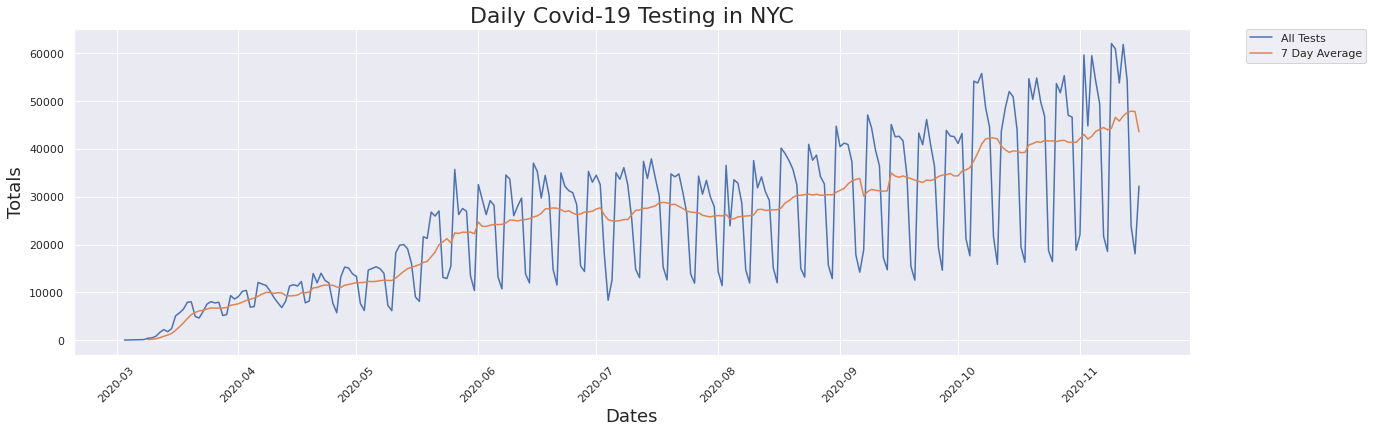

In [ ]:
# Daily Testing Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Testing in NYC', fontsize = 22)
plt.ylabel('Totals', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)


plt.plot(dates, testtotal, label="All Tests")
plt.plot(dates, seventesttotal, label="7 Day Average")
#plt.plot(dates, posperc, label="Percent Positive Results Tests")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Peak # of Tests
peakdates(testtotal,dates)

The peak occured on 2020-04-06 and had a count of 6780


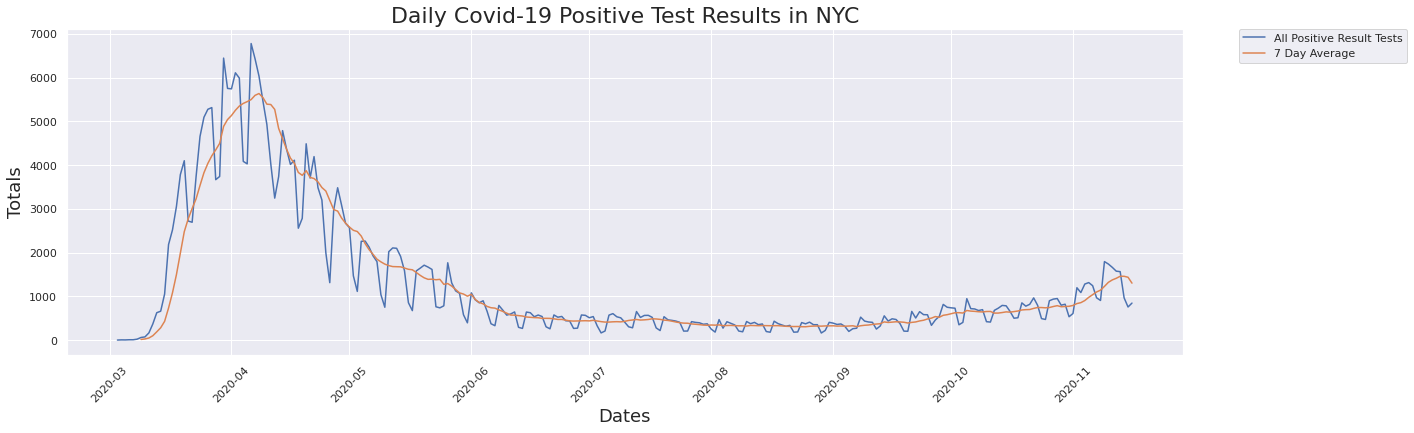

In [ ]:
# Daily Positive Tests Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Daily Covid-19 Positive Test Results in NYC', fontsize = 22)
plt.ylabel('Totals', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)


plt.plot(dates, postests, label="All Positive Result Tests")
plt.plot(dates, sevenpostests, label="7 Day Average")
#plt.plot(dates, posperc, label="Percent Positive Results Tests")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Peak # of Positive Test Results
peakdates(postests,dates)

The peak occured on 2020-03-28 and had a count of 0.7122


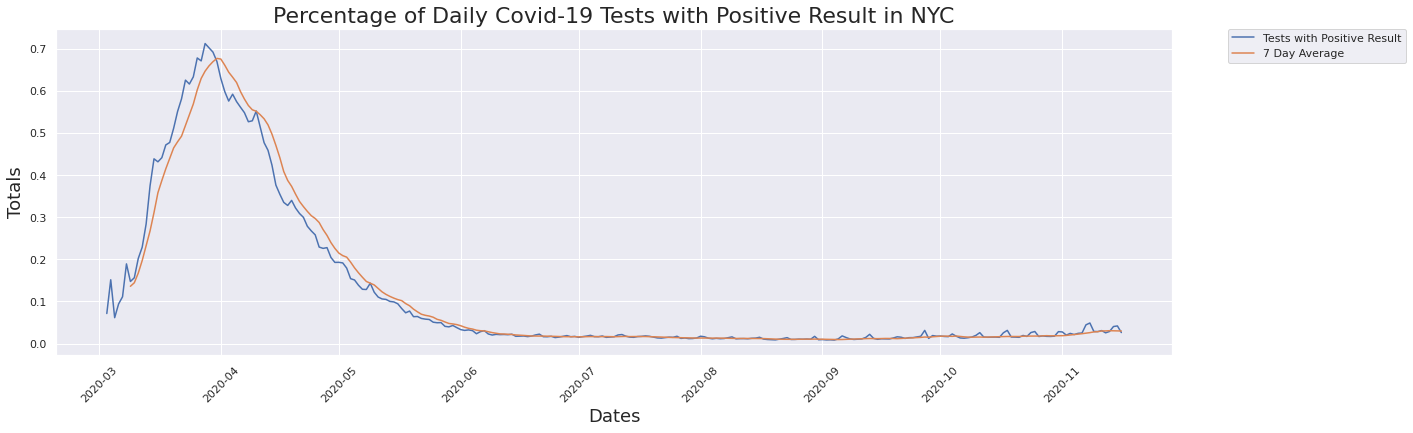

In [ ]:
# Daily % Positive Tests Plot
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Percentage of Daily Covid-19 Tests with Positive Result in NYC', fontsize = 22)
plt.ylabel('Totals', fontsize = 18)
plt.xlabel('Dates', fontsize = 18)


plt.plot(dates, posperc, label="Tests with Positive Result")
plt.plot(dates, sevenposperc, label="7 Day Average")
#plt.plot(dates, posperc, label="Percent Positive Results Tests")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Peak % of Positive Test Results
peakdates(posperc,dates)

### Maps

#### Zip Code Data

In [ ]:
# Import Data by Zip Codes
zip_df = pd.read_csv(zipcode_data)
zip_df.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,549,1988.19,27613.09,28,101.40,4.19,11517
1,10002,Chinatown/Lower East Side,Manhattan,1611,2138.80,75322.71,160,212.42,5.74,27932
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,830,1537.67,53977.81,35,64.84,2.82,28635
3,10004,Financial District,Manhattan,64,2153.35,2972.12,1,33.65,3.45,1737
4,10005,Financial District,Manhattan,136,1553.00,8757.23,2,22.84,3.49,3643


In [ ]:
# Explore Data Types
zip_df.dtypes

MODIFIED_ZCTA          int64
NEIGHBORHOOD_NAME     object
BOROUGH_GROUP         object
COVID_CASE_COUNT       int64
COVID_CASE_RATE      float64
POP_DENOMINATOR      float64
COVID_DEATH_COUNT      int64
COVID_DEATH_RATE     float64
PERCENT_POSITIVE     float64
TOTAL_COVID_TESTS      int64
dtype: object

In [ ]:
# For the map we weill use later, the properties on the json is a str.
  # The modified_zcta also has to be converted from int to str or it will not read properly when this is being mapped
zip_df.MODIFIED_ZCTA = zip_df.MODIFIED_ZCTA.astype(str)
zip_df.dtypes

MODIFIED_ZCTA         object
NEIGHBORHOOD_NAME     object
BOROUGH_GROUP         object
COVID_CASE_COUNT       int64
COVID_CASE_RATE      float64
POP_DENOMINATOR      float64
COVID_DEATH_COUNT      int64
COVID_DEATH_RATE     float64
PERCENT_POSITIVE     float64
TOTAL_COVID_TESTS      int64
dtype: object

#### Mapping

In [ ]:
# Import map data
# same as https://github.com/frnunez/nyc-doh-coronavirus-data/raw/master/Geography-resources/MODZCTA_2010_WGS1984.geo.json
covid_geo = f'{url}/Geography-resources/MODZCTA_2010_WGS1984.geo.json'


In [ ]:
# Open the json file - json.load() methods returns a python dictionary
cvoid_json = json.loads(requests.get(covid_geo).text)

# Map json features
# cvoid_json

# we loop through the dictionary to obtain the name of the communities in the json file
zipcodes_json = []
for index in range(len(cvoid_json['features'])):
    zipcodes_json.append(cvoid_json['features'][index]['properties']['MODZCTA'])
    
# print zipcodes
# zipcodes_json

In [ ]:
import folium

# Create Covid Case Count Map

#Create nyc map:
covidMap = folium.Map(location=[40.75, -74.125], zoom_start=10, tiles='cartodbpositron')

# add tile layers to the map
tiles = ['cartodbpositron','openstreetmap','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(covidMap)

#Create a layer, shaded by COVID_CASE_COUNT:
folium.Choropleth(
    geo_data= covid_geo, data=zip_df,
    columns=['MODIFIED_ZCTA', 'COVID_CASE_COUNT'],
    key_on='feature.properties.MODZCTA',
    fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.5,
    legend_name='Covid Case Count', highlight=True, smooth_factor=0
).add_to(covidMap)


# create a layer control
folium.LayerControl().add_to(covidMap)

covidMap

In [ ]:
# Create Covid Death Count Map
covidMap = folium.Map(location=[40.75, -74.125], zoom_start=10, tiles='cartodbpositron')

# add tile layers to the map
tiles = ['cartodbpositron','openstreetmap','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(covidMap)

#Create a layer, shaded by COVID DEATHS:
folium.Choropleth(
    geo_data= covid_geo, data=zip_df,
    columns=['MODIFIED_ZCTA', 'COVID_DEATH_COUNT'],
    key_on='feature.properties.MODZCTA',
    fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.5,
    legend_name='Covid Death Count', highlight=True, smooth_factor=0
).add_to(covidMap)


# create a layer control
folium.LayerControl().add_to(covidMap)

covidMap

In [ ]:
#Create nyc map:
covidMap = folium.Map(location=[40.75, -74.125], zoom_start=10, tiles='cartodbpositron')

# add tile layers to the map
tiles = ['cartodbpositron','openstreetmap','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(covidMap)

#Create a layer, shaded by COVID_CASE-COUNT:
folium.Choropleth(
    geo_data= covid_geo, data=zip_df,
    columns=['MODIFIED_ZCTA', 'PERCENT_POSITIVE'],
    key_on='feature.properties.MODZCTA',
    fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.5,
    legend_name='Covid Case Count', highlight=True, smooth_factor=0
).add_to(covidMap)


# create a layer control
folium.LayerControl().add_to(covidMap)

covidMap